X_train: (228, 1191)
y_train: (228,)
X_test: (58, 1191)
y_test: (58,)


C:\Users\louis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.850877 using {'pipeline__selectkbest__k': 10, 'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 2, 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__leaf_size': 20, 'kneighborsclassifier__algorithm': 'ball_tree'}
[[26  0]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.94      0.97        32

    accuracy                           0.97        58
   macro avg       0.96      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58

[[111   4]
 [ 22  91]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       115
           1       0.96      0.81      0.88       113

    accuracy                           0.89       228
   macro avg       0.90      0.89      0.89       228
weighted avg       0.90      0.89      0.89       228

None

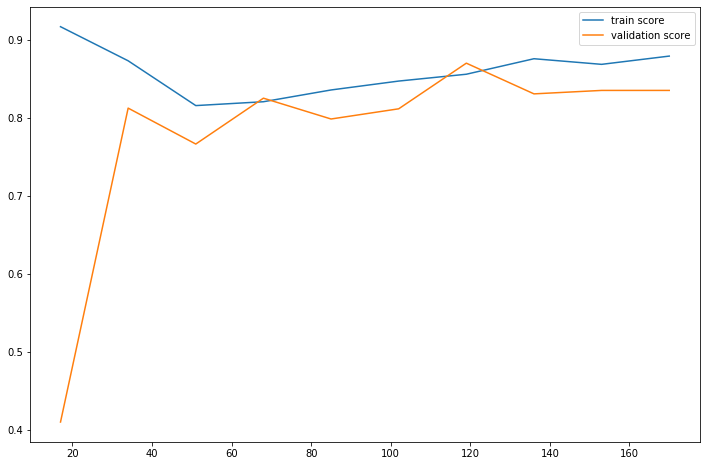

In [3]:
####################################################### PROGRAMME K-NEAREST NEIGHBORS ############################################

######### IMPORT ##########
import matplotlib.pyplot as plt
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.pipeline import make_pipeline 
import numpy as np
import pandas as pd 

######## LECTURE DES DONNEES PRE-TRAITEES ########

def load ():
    X_train = pd.read_pickle('X_trains.pkl')
    y_train = pd.read_pickle('y_trains.pkl')
    X_test = pd.read_pickle('X_test.pkl')
    y_test = pd.read_pickle('y_test.pkl')
    
    print ("X_train:", X_train.shape)
    print ("y_train:", y_train.shape)
    print("X_test:", X_test.shape)
    print("y_test:", y_test.shape)
    
    
    return (X_train, y_train, X_test, y_test) 


####### PROCEDURE D'EVALUATION DU MODEL DE MACHINE LEARNING #######

def evaluation (model, X_train, y_train, X_test, y_test):
    
    
    model.fit(X=X_train, y=y_train)
    ypred_test = model.predict(X_test)
    ypred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, ypred_test))
    print(classification_report(y_test, ypred_test))
    
    print(confusion_matrix(y_train, ypred_train))
    print(classification_report(y_train, ypred_train))
    
    
    N, train_score, val_score = learning_curve (model, X_train, y_train, cv=4, scoring = 'f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
                                               
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

######## SELECTION DE VARIABLES #########

selection =  make_pipeline(SelectKBest(f_classif, k=10))

######## LE MODEL DE DEEP LEARNING ########

KNN = make_pipeline(selection, KNeighborsClassifier ())

######## REGLAGE DES HYPERS PARAMS #########

def best_hyper_params (X_train, y_train, X_test, y_test): 
    
##### Choisissez les plages d'hyperparamètres à regler 
    hyper_params = {'kneighborsclassifier__leaf_size': range(20, 35),
               'kneighborsclassifier__n_neighbors': range(3, 5),
               'kneighborsclassifier__p' : [1, 2],
               'kneighborsclassifier__weights' : ['uniform', 'distance'], 
               'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'kneighborsclassifier__metric' : [ 'manhattan', 'minkowski'],
               'pipeline__selectkbest__k': range (8, 11)}
    
###### 
    grid = RandomizedSearchCV(KNN, hyper_params, scoring = 'accuracy', cv=4, n_iter=500)
    grid_result = grid.fit(X_train, y_train)

######
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######
    y_pred = grid.predict(X_test)

    return grid.best_estimator_


######### MAIN FUNCTION #########
def main ():
        X_train, y_train, X_test, y_test = load () 
        print (evaluation (best_hyper_params (X_train, y_train, X_test, y_test),X_train, y_train, X_test, y_test ))

if __name__== "__main__" : 
    main()






